In [1]:
import torch
from repop import dataset,params2theta,theta2params
from matplotlib import pyplot as plt
import pandas as pd

import numpy as np
np.random.seed(42)

In [2]:
cutoff = 300
df = pd.read_csv('real_data/OD_exp.csv',header=None, names=['OD_dil','20','200','2000'])
df['OD_dil'] = df['OD_dil'].fillna(method='ffill')
OD_label = [    float(i.split('"')[1])  for i in df['OD_dil'] ]

df.iloc[:,1] = pd.to_numeric(df.iloc[:,1], errors='coerce').fillna(np.inf)
df.iloc[:,2] = pd.to_numeric(df.iloc[:,2], errors='coerce').fillna(np.inf)
df.iloc[:,3] = pd.to_numeric(df.iloc[:,3], errors='coerce').fillna(0)

ks = df.to_numpy()[:,1:4]
dil_schedule = np.array((20,200,2000))#/.9



/tmp/ipykernel_77069/105950166.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1] = pd.to_numeric(df.iloc[:,1], errors='coerce').fillna(np.inf)
/tmp/ipykernel_77069/105950166.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,2] = pd.to_numeric(df.iloc[:,2], errors='coerce').fillna(np.inf)
/tmp/ipykernel_77069/105950166.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.co

In [3]:
cts,dils =[],[]
for k_line in ks:
    index = np.argmax(k_line <= cutoff) if np.any(ks <= cutoff) else len(ks) - 1
    cts.append( k_line[index] )
    dils.append( dil_schedule[index] )
    #print('Day ')

cts,dils = np.array(cts).astype(int),np.array(dils).astype(float)

In [4]:
od = np.array([float(d.split('"')[1]) for d in df['OD_dil']])

In [5]:
data =  dataset(cts[od!=1],dils[od!=1],cutoff)

In [6]:
data.evaluate(components=int(np.sqrt(data.counts.numel())))

9
10.104140953493435 -619.5371713068466 -359.1866316335012
9.324818823913917 -617.795013017853 -286.03322777606786
8.731841661018393 -617.9947314130359 -228.27446183748546
8.293613168038714 -618.2547397633195 -185.47158853854575
7.941700586709603 -618.0868975369102 -151.95304208340045
7.713592375923999 -618.3129223065054 -129.72228594335655
7.530550767319585 -618.2319524741558 -112.08577533311092
7.407674766360868 -618.9086579850768 -99.53645781502776
7.318842172547471 -619.504107602631 -90.33838610605562
7.2353126816059605 -619.5577767181559 -82.1950228863315


/home/pessoa/Codes/CElegans-Plate/dataset_class.py:234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels((ax.get_xticks()*bins[-1]).astype(int))


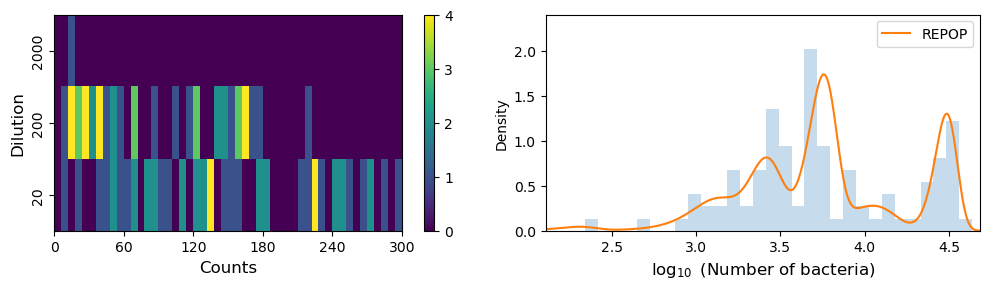

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
data.dill_imshow(ax[0],fig)
data.log_plots(ax[1])
plt.tight_layout()
ax[1].legend()
xlim = ax[1].get_xlim()
ax[1].set_ylim(0,2.4)

plt.savefig('graphs/3dils.png',dpi=500)

In [ ]:
from synth_data import cases

#make a case with the 3 higher probability peaks
m,s,r = [d[:4].cpu() for d in data.ev]
r=r/r.sum()
cs = cases.case(m.numpy(),s.numpy(),r.numpy(),'Case redone')

In [ ]:
cts,dils = cs.sample_data(size=800)

In [ ]:
data_synth =  dataset(cts,dils,300)
data_synth.evaluate()

6.251291545908115 -4751.400256394831 -248.6303567894704
6.154531221423313 -4748.337529367269 -175.1348448158591
6.130130476659844 -4749.739823753589 -154.33255376412401


(tensor([ 5889.1253,  4965.6226, 32054.2567,  5746.6970, 27418.6023,  2142.9274,
          5372.7890, 31350.1808,  2740.7598,  2629.1418, 10095.1554,  8978.2940,
          4073.1197,  4089.5959,  1421.4985,  6560.5539, 12707.0297, 12578.4093,
         12895.5770,  1747.1257,  2379.2854,   520.0699], device='cuda:0',
        dtype=torch.float64),
 tensor([ 823.8628, 1324.6306, 3781.8028, 1114.7732, 5847.8390,  296.9280,
         1288.4177, 3441.5045,  441.5999,  494.6791, 3292.3565, 2727.1840,
         1432.5976, 1158.2067,  302.8335, 2308.2558, 4572.8466, 3594.8395,
         5290.8383,  622.0852,  982.5184,  106.2560], device='cuda:0',
        dtype=torch.float64),
 tensor([0.1283, 0.1071, 0.1027, 0.0990, 0.0743, 0.0735, 0.0601, 0.0577, 0.0564,
         0.0422, 0.0380, 0.0319, 0.0252, 0.0190, 0.0167, 0.0166, 0.0155, 0.0129,
         0.0107, 0.0055, 0.0034, 0.0032], device='cuda:0', dtype=torch.float64))

/home/pessoa/Codes/CElegans-Plate/dataset_class.py:234: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels((ax.get_xticks()*bins[-1]).astype(int))


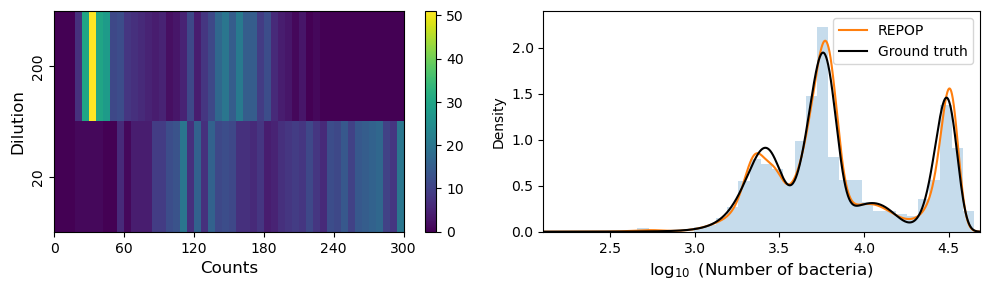

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
data_synth.dill_imshow(ax[0],fig)
data_synth.log_plots(ax[1],params2theta(m,s,r))

ax[1].set_xlim(xlim)
plt.tight_layout()
ax[1].legend()
ax[1].set_ylim(0,2.4)

plt.savefig('graphs/3dils_synth.png',dpi=500)